In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from decimal import Decimal

In [2]:
#Function definitions

''' Linear model function.
'''
def linear(x, a, b):
    return a*x + b

In [3]:
#Calculate accurate floating point uncertainties using the Decimal module

#Uncertainty percentages recorded from https://faraday.physics.utoronto.ca/specs/tegam130a.html
a_v = 0.0025
a_c = 0.0075

''' Finds the first significant digit in Decimal object n.
'''
def firstdigit(n):
    abs_n = abs(n)
    place = 0
    if (abs_n >= Decimal('1.0')):
        while (abs_n >= Decimal('10.0')):
            abs_n = Decimal.shift(abs_n, -1)
            place -= 1
    else:
        while (abs_n < Decimal('1.0')):
            abs_n = Decimal.shift(abs_n, 1)
            place += 1
    return round(n, place)

''' Finds the last significant digit in Decimal object n.
'''
def lastdigit(n):
    place = 0
    while (n % Decimal('1.0') == Decimal('0.0')):
        n = Decimal.shift(n, -1)
    while (n % Decimal('1.0') != Decimal('0.0')):
        n = Decimal.shift(n, 1)
        place -= 1
    return place

''' Calculates the maximum uncertainty by taking the larger between the error of
    accuracy and the error of precision.
    Error of accuracy is rounded to one significant digit.
'''
def finderror(x, a):
    dec_x = Decimal(str(x))
    dec_a = Decimal(str(a))
    err_a = firstdigit(dec_x * dec_a)
    err_p = Decimal('1.0') * Decimal(str(10.0**(lastdigit(dec_x))))
    return max(err_a, err_p)

In [4]:
#Load the data

cell = np.loadtxt('option1cell.txt', skiprows=1)
cell2 = np.loadtxt('option2cell.txt', skiprows=1)
supply = np.loadtxt('option1supply.txt', skiprows=1)
supply2 = np.loadtxt('option2supply.txt', skiprows=1)

# resistance of ammeter = 100.4 +- 0.502 ohms

u_cell = np.array([((float)(finderror(cell[i,0], a_v)), (float)(finderror(cell[i,1], a_c))) for i in range(len(cell))])
u_cell2 = np.array([((float)(finderror(cell2[i,0], a_v)), (float)(finderror(cell2[i,1], a_c))) for i in range(len(cell2))])
u_supply = np.array([((float)(finderror(supply[i,0], a_v)), (float)(finderror(supply[i,1], a_c))) for i in range(len(supply))])
u_supply2 = np.array([((float)(finderror(supply2[i,0], a_v)), (float)(finderror(supply2[i,1], a_c))) for i in range(len(supply2))])

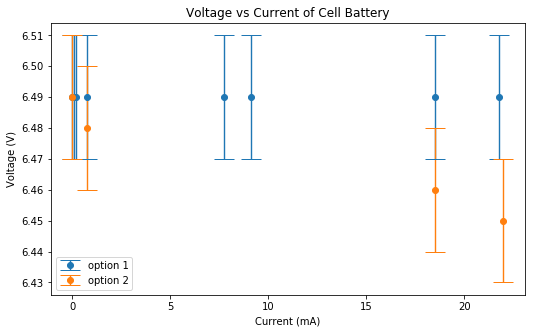

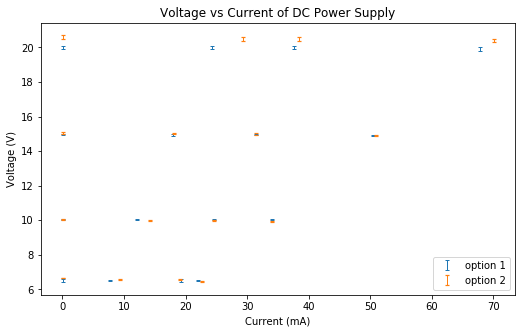

In [5]:
#Plot the raw data

plt.figure(figsize=(8.5,5))
plt.errorbar(cell[:,1], cell[:,0], yerr=u_cell[:,0], elinewidth=1.4, capsize=10.0, capthick=1.0, fmt='o', 
                label='option 1')
plt.errorbar(cell2[:,1], cell2[:,0], yerr=u_cell2[:,0], elinewidth=1.4, capsize=10.0, capthick=1.0, fmt='o', 
                 label='option 2')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current of Cell Battery')
plt.legend()
plt.savefig('graphs/cell.png', bbox_inches='tight')

plt.figure(figsize=(8.5,5))
plt.errorbar(supply[:,1], supply[:,0], yerr=u_supply[:,0], elinewidth=1.0, capsize=2.0, capthick=1.0, 
             fmt='none', label='option 1')
plt.errorbar(supply2[:,1], supply2[:,0], yerr=u_supply2[:,0], elinewidth=1.0, capsize=2.0, capthick=1.2, 
             fmt='none', label='option 2')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current of DC Power Supply')
plt.legend()
plt.savefig('graphs/supply.png', bbox_inches='tight')

R_in = 0.0015395705552839196 +- 0.00024936754075800837
V_in = 6.485887983233273 +- 0.0035852813626336185
chi squared= 0.062317741259644774


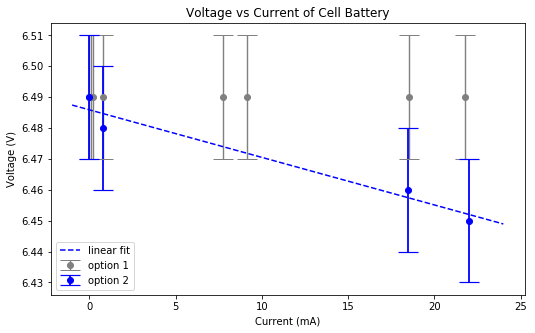

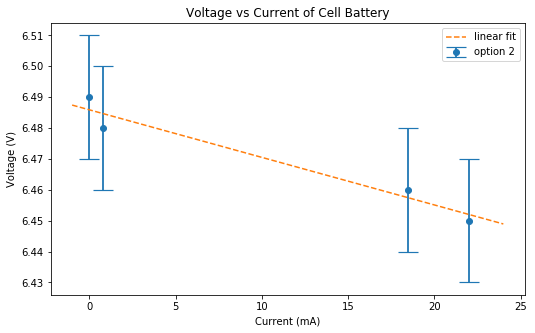

In [14]:
#Analyze the cell battery data

popt_c, pcov_c = curve_fit(linear, cell2[:,1], cell2[:,0], sigma=u_cell2[:,0])
print('R_in','=',-popt_c[0],'+-',np.sqrt(pcov_c[0,0]))
print('V_in','=',popt_c[1],'+-',np.sqrt(pcov_c[1,1]))

space = np.linspace(-1, 24, 500)
func = linear(space, popt_c[0], popt_c[1])

plt.figure(figsize=(8.5,5))
plt.errorbar(cell[:,1], cell[:,0], yerr=u_cell[:,0], elinewidth=1.4, capsize=10.0, capthick=1.0, fmt='o', 
                color='gray', label='option 1')
plt.errorbar(cell2[:,1], cell2[:,0], yerr=u_cell2[:,0], elinewidth=1.8, capsize=10.0, capthick=1.2, fmt='o', 
                 color='blue', label='option 2')
plt.plot(space, func, linestyle='dashed', color='blue', label='linear fit')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current of Cell Battery')
plt.legend()
plt.savefig('graphs/cell1.png', bbox_inches='tight')

plt.figure(figsize=(8.5,5))
plt.errorbar(cell2[:,1], cell2[:,0], yerr=u_cell2[:,0], elinewidth=1.8, capsize=10.0, capthick=1.2, fmt='o', 
                 label='option 2')
plt.plot(space, func, linestyle='dashed', label='linear fit')
plt.xlabel('Current (mA)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs Current of Cell Battery')
plt.legend()
plt.savefig('graphs/cell2.png', bbox_inches='tight')

#Reduced Chi Squared
N = len(cell2)
n = 2

func = linear(cell2[:,1], popt_c[0], popt_c[1])
squared = ((cell2[:,0] - func)/u_cell2[:,0])**2
chi = np.sum(squared)/(N-n)

print('chi squared=',chi)

R_in, 1 = 0.007061208396818516 +- 0.002143341071142524
V_in, 1 = 6.662911712312861 +- 0.0333537194024953 

R_in, 2 = 0.003164980510074689 +- 0.0008356050720813001
V_in, 2 = 10.057193759178524 +- 0.021304547185860157 

R_in, 3 = 0.002534928152575915 +- 0.0001661259072106834
V_in, 3 = 15.053825688489654 +- 0.005203538615362707 

R_in, 4 = 0.0028060259361295486 +- 0.0002590062202796091
V_in, 4 = 20.596751072771248 +- 0.011029021051793233 

chi squared= 0.5133344554166726
chi squared= 0.09705827967950831
chi squared= 0.0034217881307946076
chi squared= 0.0023934873930656175


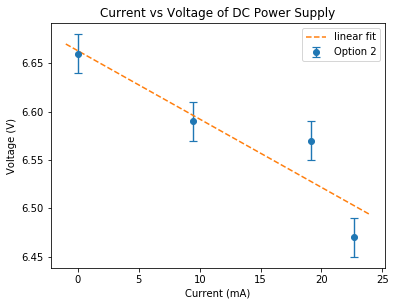

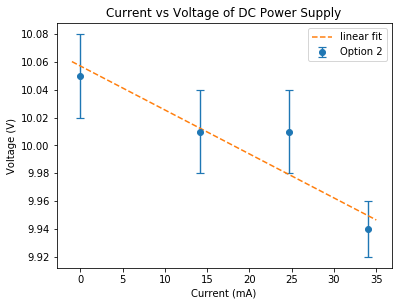

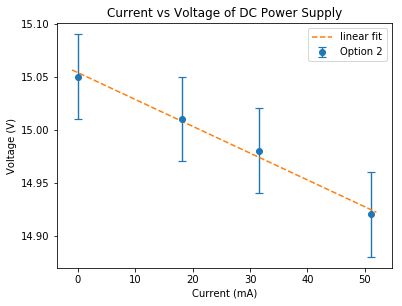

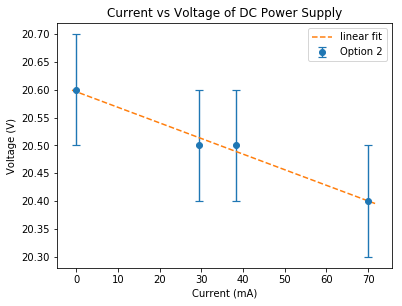

In [26]:
#Analyze the power supply data, Option 2

popt_s = [0] * 4
pcov_s = [0] * 4

for i in range(4): 
    popt_s[i], pcov_s[i] = curve_fit(linear, supply2[i*4:i*4+4,1], supply2[i*4:i*4+4,0], sigma=u_supply2[i*4:i*4+4,0])

popt_s, pcov_s = np.array(popt_s), np.array(pcov_s)

for i in range(4):
    print('R_in,',i+1,'=',-popt_s[i,0],'+-',np.sqrt(pcov_s[i,0,0]))
    print('V_in,',i+1,'=',popt_s[i,1],'+-',np.sqrt(pcov_s[i,1,1]),'\n')

def plotsequence(i):
    space = np.linspace(np.floor(supply2[i*4+3,1])-1, np.ceil(supply2[i*4+1,1])+1, 500)
    plt.figure(figsize=(6,4.5))
    #plt.errorbar(supply[:,1], supply[:,0], yerr=u_supply[:,0], label='Option 1',
    #                elinewidth=1.4, capsize=3.0, capthick=1.0, fmt='.')
    plt.errorbar(supply2[i*4:i*4+4,1], supply2[i*4:i*4+4,0], yerr=u_supply2[i*4:i*4+4,0], label='Option 2',
                    elinewidth=1.4, capsize=4.0, capthick=1.2, fmt='o')
    plt.plot(space, linear(space, popt_s[i,0], popt_s[i,1]), linestyle='dashed', label='linear fit')
    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title('Current vs Voltage of DC Power Supply')
    plt.legend()
    plt.savefig('graphs/supply'+str(i)+'(2).png', bbox_inches='tight')

#Reduced Chi Squared
N = len(supply2)
n = 2

for i in range(4): 
    plotsequence(i)
    func = linear(supply2[i*4:i*4+4,1], popt_s[i,0], popt_s[i,1])
    squared = ((supply2[i*4:i*4+4,0] - func)/u_supply2[i*4:i*4+4,0])**2
    chi = np.sum(squared)/(N-n)
    print('chi squared=',chi)

R_in, 1 = -0.0008576666028444854 +- 0.0001913239520291734
V_in, 1 = 6.50124226991822 +- 0.002595982802219741 

R_in, 2 = 0.00040915413346180786 +- 0.0003532466900359237
V_in, 2 = 10.049738754929116 +- 0.007722206679134537 

R_in, 3 = 0.0004155883175276376 +- 0.0006243573655539379
V_in, 3 = 14.955377449966905 +- 0.019393172370102386 

R_in, 4 = 0.0014754733595952934 +- 0.0006905652258062498
V_in, 4 = 20.022885012412377 +- 0.028069165083254518 



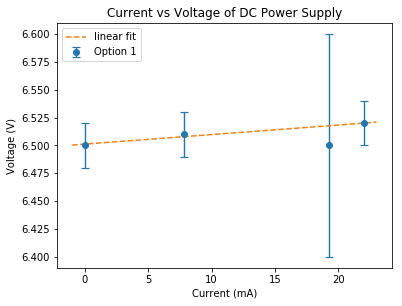

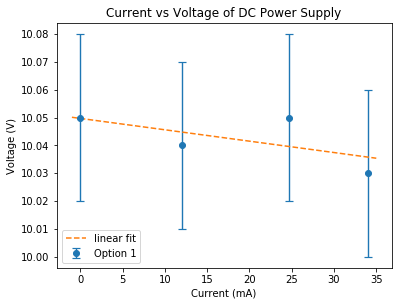

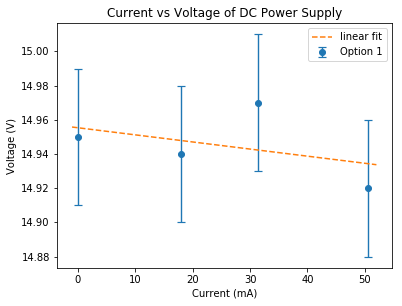

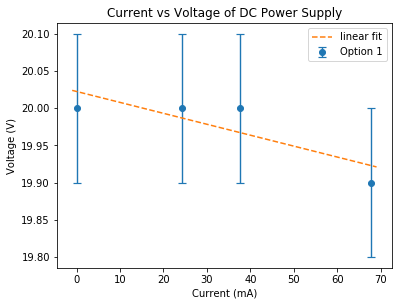

In [8]:
#Analyze the power supply data, Option 1

#Corrections for error in the uncertainty calculation due to a trailing, significant 0
u_supply[3,0] = 0.02

popt_s = [0] * 4
pcov_s = [0] * 4

for i in range(4): 
    popt_s[i], pcov_s[i] = curve_fit(linear, supply[i*4:i*4+4,1], supply[i*4:i*4+4,0], sigma=u_supply[i*4:i*4+4,0])

popt_s, pcov_s = np.array(popt_s), np.array(pcov_s)

for i in range(4):
    print('R_in,',i+1,'=',-popt_s[i,0],'+-',np.sqrt(pcov_s[i,0,0]))
    print('V_in,',i+1,'=',popt_s[i,1],'+-',np.sqrt(pcov_s[i,1,1]),'\n')

def plotsequence2(i):
    space = np.linspace(np.floor(supply[i*4+3,1])-1, np.ceil(supply[i*4+1,1])+1, 500)
    plt.figure(figsize=(6,4.5))
    plt.errorbar(supply[i*4:i*4+4,1], supply[i*4:i*4+4,0], yerr=u_supply[i*4:i*4+4,0], label='Option 1',
                    elinewidth=1.4, capsize=4.0, capthick=1.2, fmt='o')
    plt.plot(space, linear(space, popt_s[i,0], popt_s[i,1]), linestyle='dashed', label='linear fit')
    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title('Current vs Voltage of DC Power Supply')
    plt.legend()
    plt.savefig('graphs/supply'+str(i)+'(3).png', bbox_inches='tight')

for i in range(4): plotsequence2(i)

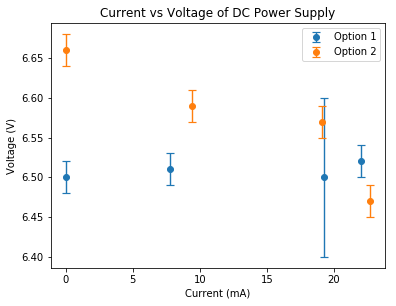

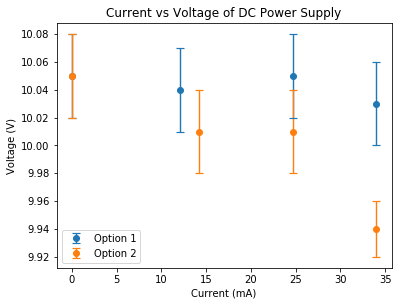

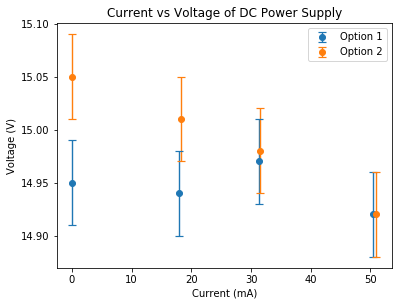

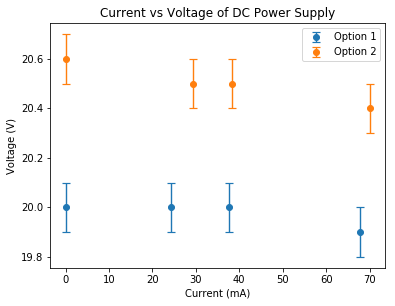

In [9]:
#Extra code

def plotsequence3(i):
    space = np.linspace(np.floor(supply[i*4+3,1])-1, np.ceil(supply[i*4+1,1])+1, 500)
    plt.figure(figsize=(6,4.5))
    plt.errorbar(supply[i*4:i*4+4,1], supply[i*4:i*4+4,0], yerr=u_supply[i*4:i*4+4,0], label='Option 1',
                    elinewidth=1.4, capsize=4.0, capthick=1.2, fmt='o')
    plt.errorbar(supply2[i*4:i*4+4,1], supply2[i*4:i*4+4,0], yerr=u_supply2[i*4:i*4+4,0], label='Option 2',
                    elinewidth=1.4, capsize=4.0, capthick=1.2, fmt='o')
    plt.xlabel('Current (mA)')
    plt.ylabel('Voltage (V)')
    plt.title('Current vs Voltage of DC Power Supply')
    plt.legend()
    plt.savefig('graphs/supply'+str(i)+'(4).png', bbox_inches='tight')

for i in range(4): plotsequence3(i)

In [10]:
''' Returns a numpy array of the voltage vs. current measurements for one resistor, from both options. 
'''
def findresistor(num):
    resistor = [(supply[i,1], supply[i,0], u_supply[i,0]) for i in 8*np.arange(4)+num]
    for i in 8*np.arange(4)+num: resistor.append((supply2[i,1], supply2[i,0], u_supply2[i,0]))
    return np.array(resistor)

resistors = np.array([findresistor(i) for i in range(8)])

popt_r = [0] * 8
pcov_r = [0] * 8
for i in range(8):
    popt_r[i], pcov_r[i] = curve_fit(linear, resistors[i,:,0], resistors[i,:,1], sigma=resistors[i,:,2])

popt_r, pcov_r = np.array(popt_r), np.array(pcov_r)

IndexError: index 16 is out of bounds for axis 0 with size 16

In [ ]:
'''
changing internal resistance of ammeter by changing range? the value of rounding changes, 
option 1 voltmeter unaffected, option 2 voltmeter affected
'''